In [11]:
import cv2
import pytesseract

In [282]:
# Load the image
img = cv2.imread("pais3.png", cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to binarize the image
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                cv2.THRESH_BINARY, 9, 1)

# Invert the image for OCR
inverted = cv2.bitwise_not(binary)
custom_config = r'--oem 2 --psm 7 -c tessedit_char_whitelist=0123456789'
# Extract text from the image
text = pytesseract.image_to_string(img, config=custom_config)

# Clean the extracted text and keep only digits1
digits = ''.join(filter(str.isdigit, text))
digits

'392'

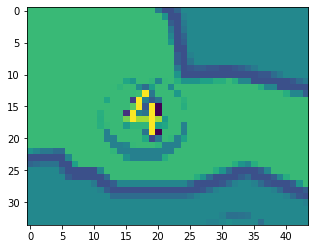

In [279]:
plt.imshow(gray)

In [55]:
text

'7\n'

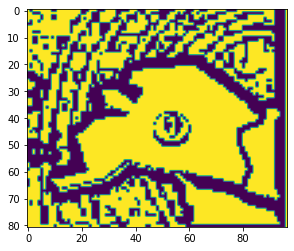

In [4]:
import matplotlib.pyplot as plt
plt.imshow(binary)

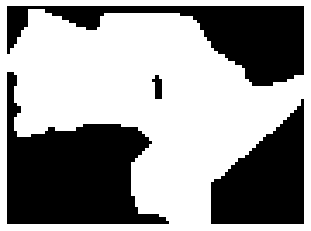

In [251]:
import numpy as np
# 1. Leer la imagen
img_path = 'Image.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 2. Aplicar Gaussian blur para suavizar la imagen
blurred = cv2.GaussianBlur(img, (5,5), 0)

# 3. Binarizar la imagen usando Otsu's thresholding
_, binary = cv2.threshold(blurred, 0, 50, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4. Invertir los colores (hacer el número blanco y el fondo negro)
inverted = cv2.bitwise_not(binary)

# 5. Aplicar erosión para adelgazar el número
kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(inverted, kernel, iterations=1)
inverted = cv2.bitwise_not(eroded)
# 6. Aplicar una erosión más agresiva para adelgazar el número aún más
#more_eroded = cv2.erode(eroded, kernel, iterations=1)

# 7. Mostrar la imagen resultante (opcional)
plt.imshow(inverted, cmap='gray')
plt.axis('off')  # Apagar números y marcas del eje
plt.show()

In [26]:
text = pytesseract.image_to_string(eroded, config='--psm 6')

In [25]:
text

''

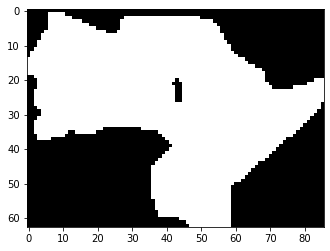

In [8]:
inverted = cv2.bitwise_not(eroded)
plt.imshow(inverted, cmap='gray')

In [27]:
from PIL import Image

In [29]:
img = Image.open('pais.png')
img.show()

In [30]:
img_bw= img.convert('L')
img_bw.show()

In [41]:
from PIL import ImageEnhance
img_bwb = ImageEnhance.Brightness(img_bw)
img_bwbe = img_bwb.enhance(0.9)
img_bwc = ImageEnhance.Contrast(img_bwbe)
img_bwcb = img_bwc.enhance(1.5)
img_bwcb.show()

In [51]:
text = pytesseract.image_to_string(img)

In [52]:
text

''

In [58]:
# Load the image
img = cv2.imread("pais.png", cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to binarize the image
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                cv2.THRESH_BINARY, 9, 1)

# Invert the image for OCR
inverted = cv2.bitwise_not(binary)
custom_config = r'--oem 3 --psm 6 outputbase digits'
# Extract text from the image
text = pytesseract.image_to_string(img, config="--psm 6")

# Clean the extracted text and keep only digits1
digits = ''.join(filter(str.isdigit, text))
digits

''

In [80]:
# Load the image
img = cv2.imread("pais.png")

custom_config = r'--oem 3 --psm 6 outputbase digits'
# Extract text from the image
text = pytesseract.image_to_string(img, config=custom_config)

# Clean the extracted text and keep only digits1
digits = ''.join(filter(str.isdigit, text))
digits

'7'

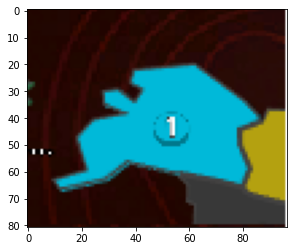

In [101]:
plt.imshow(img)

Números detectados: 11531447050106005121115513513111155951537531515940121103011510311101111111136155130510441515134772117223017


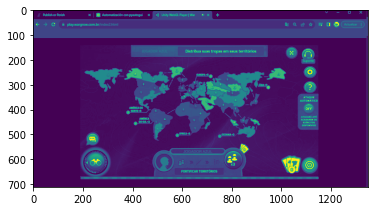

In [227]:
import cv2
import pytesseract

# Load the image
img = cv2.imread("mapa.png")
# Convierte la imagen a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Configura Tesseract OCR
custom_config = r'--oem 2 --psm 6 -c tessedit_char_whitelist=0123456789'
plt.imshow(img_gray)
# Extract text from the preprocessed image
text = pytesseract.image_to_string(img_gray, config=custom_config)

# Clean the extracted text and keep only digits
digits = ''.join(filter(str.isdigit, text))

# Print the recognized digits
print("Números detectados:", digits)

In [258]:
import cv2
import pytesseract

# Load the image
img = cv2.imread("pais3.png")

# Convierte la imagen a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 2. Aplicar Gaussian blur para suavizar la imagen
blurred = cv2.GaussianBlur(img_gray, (5,5), 0)

# 3. Binarizar la imagen usando Otsu's thresholding
_, binary = cv2.threshold(blurred, 0, 50, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4. Invertir los colores (hacer el número blanco y el fondo negro)
inverted = cv2.bitwise_not(binary)

# 5. Aplicar erosión para adelgazar el número
kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(inverted, kernel, iterations=1)
inverted = cv2.bitwise_not(eroded)
# Configura Tesseract OCR
custom_config = r'--oem 2 --psm 6 -c tessedit_char_whitelist=0123456789'

# Obtén información sobre la detección de caracteres en la imagen
boxes = pytesseract.image_to_boxes(inverted, config=custom_config)

# Dibuja los cuadros de los caracteres en la imagen original
for b in boxes.splitlines():
    b = b.split()
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x, y), (w, h), (0, 255, 0), 1)

# Guarda la imagen con los cuadros de los caracteres
cv2.imwrite("output.png", img)

# Imprime los caracteres detectados y sus coordenadas
print("Números detectados y sus coordenadas:")
for b in boxes.splitlines():
    b = b.split()
    char, x, y, w, h = b[0], int(b[1]), int(b[2]), int(b[3]), int(b[4])
    print(f"Carácter: {char}, Coordenadas: x={x}, y={y}, w={w}, h={h}")

Números detectados y sus coordenadas:


Números detectados y sus coordenadas:


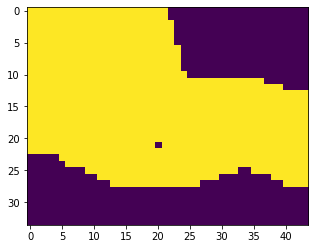

In [259]:
plt.imshow(inverted)

In [225]:
import numpy as np
# 1. Leer la imagen
img_path = 'mapa.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 2. Aplicar Gaussian blur para suavizar la imagen
blurred = cv2.GaussianBlur(img, (5,5), 0)

# 3. Binarizar la imagen usando Otsu's thresholding
_, binary = cv2.threshold(blurred, 0, 50, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4. Invertir los colores (hacer el número blanco y el fondo negro)
inverted = cv2.bitwise_not(binary)

# 5. Aplicar erosión para adelgazar el número
kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(inverted, kernel, iterations=1)
inverted = cv2.bitwise_not(eroded)
# 6. Aplicar una erosión más agresiva para adelgazar el número aún más
#more_eroded = cv2.erode(eroded, kernel, iterations=1)


custom_config = r'--oem 2 --psm 7 -c tessedit_char_whitelist=0123456789 '
text = pytesseract.image_to_string(img, config=custom_config)
print(text)

# 7. Mostrar la imagen resultante (opcional)
plt.imshow(img, cmap='gray')
plt.axis('off')  # Apagar números y marcas del eje
plt.show()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)
